In [1]:
%pylab inline
import cv2
import imutils
from imutils import contours
import matplotlib.patches as patches
import pytesseract
import zbar
import labelreader
import skimage.morphology

Populating the interactive namespace from numpy and matplotlib


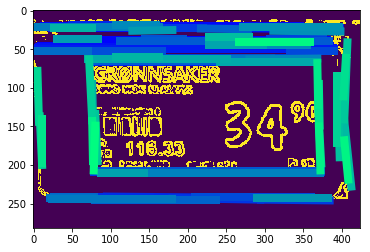

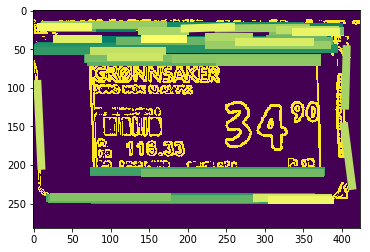

In [42]:
image = cv2.imread("haar_classifier/new_supermarket_photos/spar_results/ok/77.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grad = labelreader.imageGrads(labelreader.normalizeImage(gray))
grad = cv2.threshold(grad, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

threshold=50
line_length=50
line_gap=0
theta=180

lines = skimage.transform.probabilistic_hough_line(
    grad, threshold=threshold, line_length=line_length,
    line_gap=line_gap,
    theta=np.linspace(-np.pi/2., np.pi/2., theta)
)

cmap = plt.get_cmap("winter")
plt.imshow(grad)
for idx, line in enumerate(lines):
    (x1,y1),(x2,y2) = line
    plt.plot([x1, x2], [y1, y2], '-', color=cmap(float(idx) / len(lines)), linewidth=8.0)
plt.show()


lines = cv2.HoughLinesP(
        grad,
        rho=1,
        theta=np.pi/theta,
        threshold=threshold,
        minLineLength=line_length,
        maxLineGap=line_gap)

cmap = plt.get_cmap("summer")
plt.imshow(grad)
for idx, line in enumerate(lines):
        for x1,y1,x2,y2 in line:
            plt.plot([x1, x2], [y1, y2], '-', color=cmap(float(idx) / len(lines)), linewidth=8.0)
plt.show()

In [38]:
np.linspace?

In [41]:
np.linspace(-np.pi/2., np.pi/2., 180)

array([-1.57079633, -1.55324553, -1.53569473, -1.51814394, -1.50059314,
       -1.48304234, -1.46549155, -1.44794075, -1.43038995, -1.41283915,
       -1.39528836, -1.37773756, -1.36018676, -1.34263597, -1.32508517,
       -1.30753437, -1.28998358, -1.27243278, -1.25488198, -1.23733118,
       -1.21978039, -1.20222959, -1.18467879, -1.167128  , -1.1495772 ,
       -1.1320264 , -1.11447561, -1.09692481, -1.07937401, -1.06182322,
       -1.04427242, -1.02672162, -1.00917082, -0.99162003, -0.97406923,
       -0.95651843, -0.93896764, -0.92141684, -0.90386604, -0.88631525,
       -0.86876445, -0.85121365, -0.83366286, -0.81611206, -0.79856126,
       -0.78101046, -0.76345967, -0.74590887, -0.72835807, -0.71080728,
       -0.69325648, -0.67570568, -0.65815489, -0.64060409, -0.62305329,
       -0.60550249, -0.5879517 , -0.5704009 , -0.5528501 , -0.53529931,
       -0.51774851, -0.50019771, -0.48264692, -0.46509612, -0.44754532,
       -0.42999453, -0.41244373, -0.39489293, -0.37734213, -0.35

In [40]:
np.linspace?